# Summary

An Artificial Neural Network (ANN) was created to predict a bank’s member retention. This model was trained on the bank’s historical data which had features that included: member credit score, gender, location, length of membership, balance, and other features.

This ANN was created using Keras/Tensorflow and reached an accuracy of 86.3% on the validation set

## **Data preprocessing**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
#Import the dataset and conduct the initial preprocessing
dataset = pd.read_csv('Churn_Modeling.csv').iloc[:,3:]
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Encoding categorical data in features
#Sex: Female=0, Male=1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X[0]

array([619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [4]:
#Encoding categorical data in features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#Geography: France Germany Spain
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], 
                       remainder='passthrough')
X = ct.fit_transform(X)
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [5]:
#Splitting the dataset into the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [6]:
#Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building and training the ANN

In [7]:
def model(layers=[100]):
    model = tf.keras.models.Sequential()
    for i in layers:
        model.add(tf.keras.layers.Dense(units=i, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 
    return model

In [8]:
#Training the ANN
ann = model([3000])
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = ann.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=16, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4188 - accuracy: 0.8313 - val_loss: 0.3590 - val_accuracy: 0.8536
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3549 - accuracy: 0.8538 - val_loss: 0.3488 - val_accuracy: 0.8596
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3589 - accuracy: 0.8485 - val_loss: 0.3425 - val_accuracy: 0.8656
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3465 - accuracy: 0.8569 - val_loss: 0.3353 - val_accuracy: 0.8648
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3427 - accuracy: 0.8578 - val_loss: 0.3391 - val_accuracy: 0.8624
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3379 - accuracy: 0.8609 - val_loss: 0.3339 - val_accuracy: 0.8628
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3357 - accuracy: 0.8531 - val_loss: 0.3406 - val_accuracy: 0.8616
Epoch 

## Evaluating the model

In [9]:
#Making predictions on the testing set and setting the value to a 1 (leaving the bank)
#if the model returns a value greater than or equal to 0.5
y_pred = np.array([1 if x >= 0.5 else 0 for x in ann.predict(X_test)])

<AxesSubplot:>

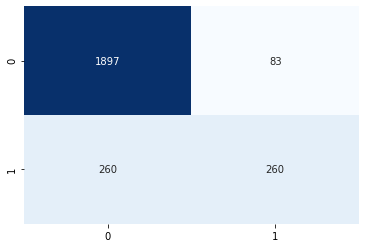

In [10]:
#Making the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=cm, fmt='', cbar=False, cmap='Blues')

<AxesSubplot:>

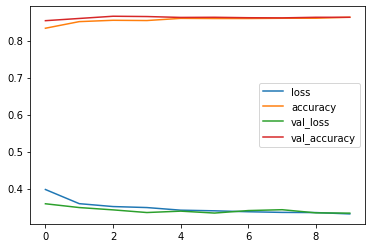

In [11]:
#Plot of loss and accuracy of training and testing set
pd.DataFrame(hist.history).plot()

In [12]:
#Making a single prediction
#The model predicts that an active member (with a credit card) that is a 35 year old male from France with a credit score 
#of 500 that's been with the bank for 2 years and has a $2500 balance with an estimated $30,000 annual income will not leave
ann.predict(sc.transform([[1, 0, 0, 500, 1, 35, 2, 2500, 1, 1, 1, 30000]]))

array([[0.05979967]], dtype=float32)